In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


# a

In [2]:
def FirstDer(a, b, M, u, U_a, U_b):
    '''
    Parameters
    ----------
    u: Function being differentiated
    a,b: Numbers making the boundaries of interval of differentiation
    M: integer, number of interior points the function is being differentiated
    U_a, U_b: Floating point numbers, giving information about the derivative at the boundary points
    
    Returns:
    -------
    An array of size M, containing values of the derivatives at the interior points 
    of the interval of differentiation.
    '''
    
    h =(b-a)/(M+1);
    x=linspace(a,b, M+2)
    x_j =x[1:-1]
    s=(M,M)
    A=np.zeros(s)
    F=np.zeros(M)
    
    for i in range(0,M):
        A[i,i]=4
        if (i==0):
            A[i,i+1]=1
            F[i]=3/h*(-u(x_j[i]-h)+u(x_j[i]+h))-U_a
        elif (0<i<M-1):
            A[i,i-1]=1
            A[i,i+1]=1
            F[i]=3/h*(-u(x_j[i]-h)+u(x_j[i]+h))
        elif (i==M-1):
            A[i,i-1]=1
            F[i]=3/h*(-u(x_j[i]-h)+u(x_j[i]+h))- U_b
    return linalg.solve(A,F)

In [3]:
def SecondDer(a, b, M, u, U_a, U_b):
    '''
    Parameters
    ----------
    u: Function being differentiated
    a,b: Numbers making the boundaries of interval of differentiation
    M: integer, number of interior points the function is being differentiated
    U_b, U_b: Floating point numbers, giving information about the second derivative at the boundary points
    
    Returns:
    -------
    An array of size M, containing values of the second derivatives at the interior points 
    of the interval of differentiation.
    '''
    h =(b-a)/(M+1);
    x=linspace(a,b, M+2)
    x_j =x[1:-1]
    s=(M,M)
    A=np.zeros(s)
    F=np.zeros(M)
    
    for i in range(0,M):
        A[i,i]=10
        if (i==0):
            A[i,i+1]=1
            F[i]=12/(h**2)*(u(x_j[i]-h)-2*u(x_j[i])+u(x_j[i]+h))-U_a
        elif(0<i<M-1):
            A[i,i-1]=1
            A[i, i+1]=1
            F[i]=12/(h**2)*(u(x_j[i]-h)-2*u(x_j[i])+u(x_j[i]+h))
        elif  (i==M-1):
            A[i,i-1]=1
            F[i]=12/(h**2)*(u(x_j[i]-h)-2*u(x_j[i])+u(x_j[i]+h))- U_b
    return linalg.solve(A,F)

# b

In [4]:
u = lambda x: x**2*exp(-x) # vectorized function u
uprime = lambda x: 2 *exp(-x)*x - exp(-x)*x**2  # First derivative
udprime = lambda x: (x**2 - 4*x +2)*exp(-x)   # Second derivative

# The L2 norm
def RelativeL2norm(E, A):
    '''
    parameters
    ----------
    E: vector of the estimated values
    A: Actual values of the derivative
    
    Returns:
    The L2 norm of the error estimate (Floating point number)
    '''
    d= A-E
    return sqrt(sum(d**2)/sum(A**2))

In [5]:
m =7
E1=FirstDer(0,1,m,u,uprime(0),uprime(1)) 
E2=SecondDer(0,1,m,u,udprime(0),udprime(1))  #The estimated values

In [6]:
E1

array([0.20686482, 0.34074188, 0.41883265, 0.45491032, 0.46000065,
       0.44285157, 0.41035678])

In [7]:
a = 0
b = 1
h = (b-a)/(m+1) 
x = zeros(m+2)
for j in range(m+2):
    x[j] = a + j*h
    
A1 = uprime(x[1:-1])
A2 = udprime(x[1:-1])
A1

array([0.20683521, 0.34072534, 0.4188169 , 0.45489799, 0.45999029,
       0.44284364, 0.41034855])

In [8]:
RelativeL2norm(E1, A1) # first derivative error

4.0003240562398184e-05

In [9]:
RelativeL2norm(E2, A2)  # second derivative error

2.7613389113475898e-05

In [10]:
U_a = uprime(a)
U_b = uprime(b)

Ud_a = udprime(a)
Ud_b = udprime(b)

<IPython.core.display.Javascript object>


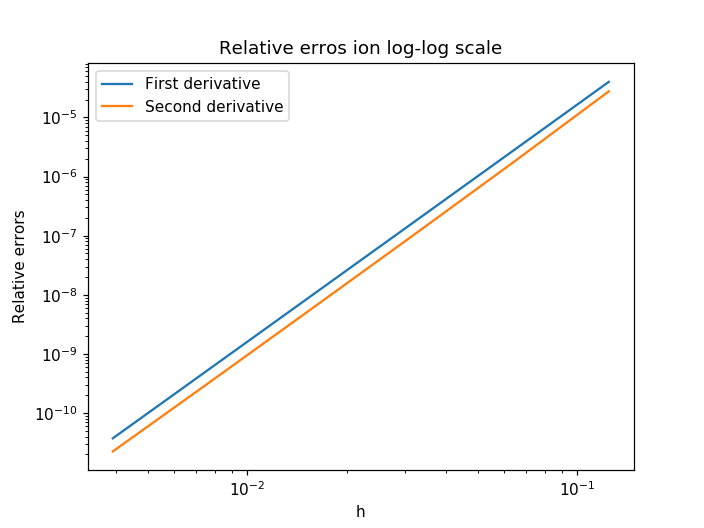

In [11]:
M = [7,15,31,63,127,255]           
L1 = []                             
L2 = []
H = []
for m in M:
    
    
    E1 = FirstDer(a, b, m, u, U_a, U_b)
    E2 = SecondDer(a, b, m, u, Ud_a, Ud_b)
    
    h = (b-a)/(m+1)
    H.append(h)
    x = linspace(a,b,m+2)

    Uf = uprime(x[1:-1])
    Us = udprime(x[1:-1])

    l1 = RelativeL2norm(E1, Uf)
    l2 = RelativeL2norm(E2, Us)
    L1.append(l1)
    L2.append(l2)

figure(1)
loglog(H,L1,label = 'First derivative')
loglog(H,L2,label = 'Second derivative')
title('Relative erros ion log-log scale')
xlabel('h')
ylabel('Relative errors')
legend()
show()

In [17]:
H

[0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]

In [13]:
n = len(M)
T1 = zeros((n,2))
T2 = zeros((n,2))
for i in range(n):
    T1[i,0] = H[i]
    T1[i,1] = L1[i]
    
    T2[i,0] = H[i]
    T2[i,1] = L2[i]

In [14]:
T1

array([[1.25000000e-01, 4.00032406e-05],
       [6.25000000e-02, 2.47811741e-06],
       [3.12500000e-02, 1.54004927e-07],
       [1.56250000e-02, 9.59465883e-09],
       [7.81250000e-03, 5.98656024e-10],
       [3.90625000e-03, 3.73836340e-11]])

In [15]:
T2

array([[1.25000000e-01, 2.76133891e-05],
       [6.25000000e-02, 1.56700482e-06],
       [3.12500000e-02, 9.37281024e-08],
       [1.56250000e-02, 5.73608492e-09],
       [7.81250000e-03, 3.54828913e-10],
       [3.90625000e-03, 2.24313055e-11]])